In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier

plt.rcParams['font.family'] = 'D2Coding'


# 선형회귀 연습문제

In [2]:
df = pd.DataFrame({"마력":[ 130, 250, 190, 300, 210, 220, 170 ],
		       "총중량":[ 1900, 2600, 2200, 2900, 2400, 2300, 2100 ],
		       "연비":[ 16.3, 10.2, 11.1, 7.1, 12.1, 13.2, 14.2 ]})

In [3]:
df

,마력,총중량,연비
0,130,1900,16.3
1,250,2600,10.2
2,190,2200,11.1
3,300,2900,7.1
4,210,2400,12.1
5,220,2300,13.2
6,170,2100,14.2


## 1) 적절한 선형회귀모델을 구현하라. 모델의 계수, 절편, 예측모델 점수를 출력하라.

In [4]:
X = df.iloc[:,:2]
y = df.iloc[:,2]

In [5]:
reg = LinearRegression()

reg.fit(X, y)

LinearRegression()

In [6]:
reg.coef_

array([-0.00689189, -0.00731081])

In [7]:
reg.intercept_

30.60405405405405

In [8]:
reg.score(X, y)

0.8871254041192393

In [9]:
help(reg.score)

Help on method score in module sklearn.base:

score(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Return the coefficient of determination :math:`R^2` of the
    prediction.
    
    The coefficient :math:`R^2` is defined as :math:`(1 - \frac{u}{v})`,
    where :math:`u` is the residual sum of squares ``((y_true - y_pred)
    ** 2).sum()`` and :math:`v` is the total sum of squares ``((y_true -
    y_true.mean()) ** 2).sum()``. The best possible score is 1.0 and it
    can be negative (because the model can be arbitrarily worse). A
    constant model that always predicts the expected value of `y`,
    disregarding the input features, would get a :math:`R^2` score of
    0.0.
    
    Parameters
    ----------
    X : array-like of shape (n_samples, n_features)
        Test samples. For some estimators this may be a precomputed
        kernel matrix or a list of generic objects instead with shape
        ``(n_samples, n_samples_fitted)``, whe

## 2) 270마력, 총중량 2500kg의 자동차를 개발하려한다. 이 자동차의 연비를 선형회귀모델로 예측하라.

In [10]:
reg.predict([[270, 2500]])

array([10.46621622])

## 3) 마력, 총중량, 연비 사이의 상관관계를 "쌍플롯"으로 그리도록 하라.

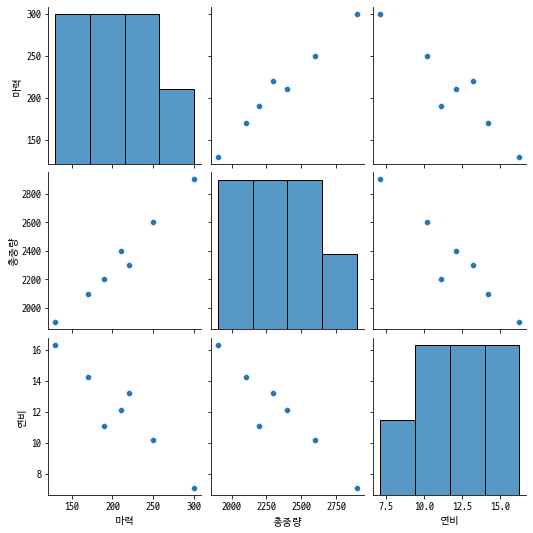

In [11]:
sns.pairplot(df)

## 4) 마력, 총중량, 연비사이의 상관관계를 seaborn 히트맵으로 구현하라.

In [12]:
df.corr()

,마력,총중량,연비
마력,1.000000,0.987548,-0.933098
총중량,0.987548,1.000000,-0.941658
연비,-0.933098,-0.941658,1.000000


<AxesSubplot:>

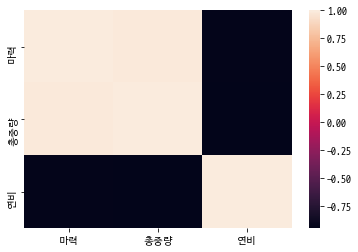

In [13]:
sns.heatmap(df.corr())

# kNN 분류 연습문제

In [14]:
닥스훈트 = { "길이":[77, 78, 85, 83, 73, 77, 73, 80],
            "높이":[25, 28, 29, 30, 21, 22, 17, 35]}

사모예드 = { "길이":[75, 77, 86, 86, 79, 83, 83, 88],
            "높이":[56, 57, 50, 53, 60, 53, 49, 61]}            

말티즈 = { "길이":[34, 38, 38, 41, 30, 37, 41, 35],
            "높이":[22, 25, 19, 30, 21, 24, 28, 18]}            

In [15]:
길이 = 닥스훈트["길이"]+사모예드["길이"]+말티즈["길이"]
높이 = 닥스훈트["높이"]+사모예드["높이"]+말티즈["높이"]
종 = [ i//8 for i in range(24)]

df = pd.DataFrame({"길이":길이, "높이":높이, "종":종})
    

In [16]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
길이,77,78,85,83,73,77,73,80,75,77,...,83,88,34,38,38,41,30,37,41,35
높이,25,28,29,30,21,22,17,35,56,57,...,49,61,22,25,19,30,21,24,28,18
종,0,0,0,0,0,0,0,0,1,1,...,1,1,2,2,2,2,2,2,2,2


<AxesSubplot:xlabel='길이', ylabel='높이'>

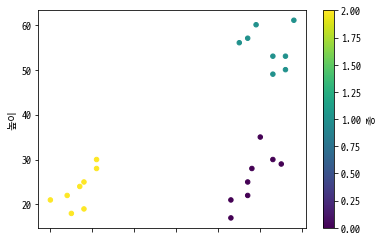

In [17]:
df.plot.scatter(x="길이", y="높이", c="종", cmap="viridis")

## 1) 데이터와 레이블을 생성하라.

In [18]:
X = df.iloc[:,:2]
y = df.iloc[:, 2]

## 2) 데이터를 n_neighbor를 1~5로 사용하여 분류하라.

In [19]:
clf = KNeighborsClassifier()

clf.fit(X, y)

KNeighborsClassifier()

In [20]:
dat = np.array([[45,34], [70, 59], [49,30],[60, 56]])

predictions = clf.predict(dat)

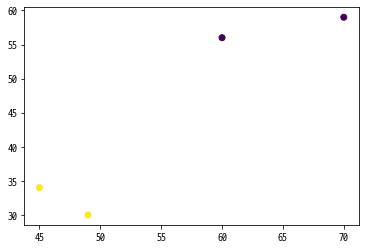

In [21]:
plt.scatter(x=dat[:,0], y=dat[:,1], c=predictions)

In [22]:
def classifier_app(n):
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(X, y)
    predictions = clf.predict(dat)
    print(predictions)
    plt.scatter(x=dat[:,0], y=dat[:,1], c=predictions)
    plt.show()

--------1-----------
[2 1 2 1]


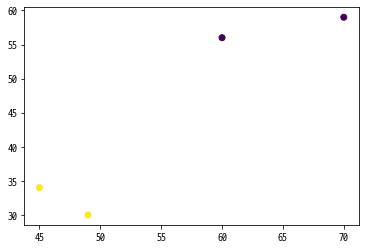

--------2-----------
[2 1 2 1]


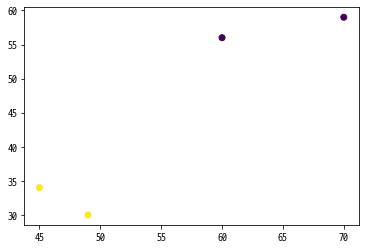

--------3-----------
[2 1 2 1]


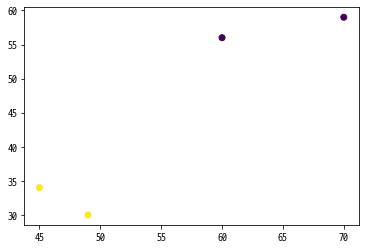

--------4-----------
[2 1 2 1]


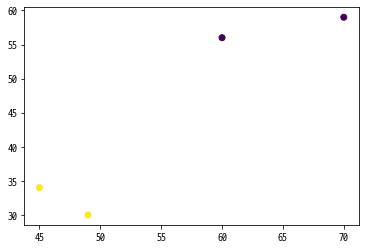

--------5-----------
[2 1 2 1]


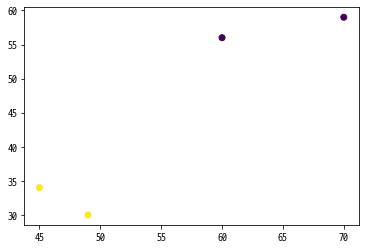

In [23]:
for n in range(1, 6):
    print(f"--------{n}-----------")
    classifier_app(n)